<a href="https://colab.research.google.com/github/rafaelrlima/smarkio_test_data_science/blob/main/smarkio_analise_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Ciência de Dados Smarkio - Análise ML

Esse projeto foi publicado em: https://github.com/rafaelrlima/smarkio_test_data_science

Teste realizado por: Rafael Ribeiro de Lima

Status: Em execução

Etapas executadas nesse arquivo:
1. Análise exploratória dos dados utilizando estatística descritiva e inferencial,
considerando uma, duas e/ou mais variáveis;
2. Calcule o desempenho do modelo de classificação utilizando pelo menos três
métricas;
3. Crie um classificador que tenha como output se os dados com status igual a
revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold);
4. Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a
diferença;

## Imports

In [58]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão


import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

## Carregando Dataset

In [59]:

column_names = ["Pred_class", "probabilidade" , "status", "True_class"]

xls = '/content/drive/MyDrive/Colab Notebooks/teste_smarkio_lbs.xls'

data = pd.read_excel(xls, sheet_name='Análise_ML')


## Explorando os Dados

In [60]:
data.head

<bound method NDFrame.head of      Pred_class  probabilidade    status  True_class
0             2       0.079892  approved         0.0
1             2       0.379377  approved        74.0
2             2       0.379377  approved        74.0
3             2       0.420930  approved        74.0
4             2       0.607437  approved         NaN
..          ...            ...       ...         ...
638          60       0.543772  revision         NaN
639          60       0.553846  revision         NaN
640          77       0.606065  revision         NaN
641          84       0.561842  revision         NaN
642          96       0.340740  revision         NaN

[643 rows x 4 columns]>

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


In [62]:
data.describe()

,Pred_class,probabilidade,True_class
count,643.000000,643.000000,181.000000
mean,52.712286,0.622436,38.574586
std,37.602068,0.266811,39.581017
min,2.000000,0.043858,0.000000
25%,12.000000,0.408017,0.000000
50%,59.000000,0.616809,24.000000
75%,81.000000,0.870083,74.000000
max,118.000000,1.000000,117.000000


In [63]:
data.mode()

,Pred_class,probabilidade,status,True_class
0,3,1.0,approved,0.0


In [64]:
print(data)

     Pred_class  probabilidade    status  True_class
0             2       0.079892  approved         0.0
1             2       0.379377  approved        74.0
2             2       0.379377  approved        74.0
3             2       0.420930  approved        74.0
4             2       0.607437  approved         NaN
..          ...            ...       ...         ...
638          60       0.543772  revision         NaN
639          60       0.553846  revision         NaN
640          77       0.606065  revision         NaN
641          84       0.561842  revision         NaN
642          96       0.340740  revision         NaN

[643 rows x 4 columns]


##Criando Um classificador para preencher a coluna True_class gerando a coluna True_class_new


In [65]:
df = pd.DataFrame(data, columns = ['Pred_class' , 'probabilidade' , 'status' , 'True_class'])
df.columns = ['Pred_class' , 'probabilidade' , 'status' , 'True_class']
df['True_class_new'] = 0


In [66]:
print(df)

     Pred_class  probabilidade    status  True_class  True_class_new
0             2       0.079892  approved         0.0               0
1             2       0.379377  approved        74.0               0
2             2       0.379377  approved        74.0               0
3             2       0.420930  approved        74.0               0
4             2       0.607437  approved         NaN               0
..          ...            ...       ...         ...             ...
638          60       0.543772  revision         NaN               0
639          60       0.553846  revision         NaN               0
640          77       0.606065  revision         NaN               0
641          84       0.561842  revision         NaN               0
642          96       0.340740  revision         NaN               0

[643 rows x 5 columns]


In [67]:
import warnings
warnings.filterwarnings('ignore')

for b in df.itertuples():
    if (b.True_class >= 0):
        df.True_class_new[b.Index] = b.True_class
    else:
        df.True_class_new[b.Index] = b.Pred_class



In [68]:
print(df)

     Pred_class  probabilidade    status  True_class  True_class_new
0             2       0.079892  approved         0.0               0
1             2       0.379377  approved        74.0              74
2             2       0.379377  approved        74.0              74
3             2       0.420930  approved        74.0              74
4             2       0.607437  approved         NaN               2
..          ...            ...       ...         ...             ...
638          60       0.543772  revision         NaN              60
639          60       0.553846  revision         NaN              60
640          77       0.606065  revision         NaN              77
641          84       0.561842  revision         NaN              84
642          96       0.340740  revision         NaN              96

[643 rows x 5 columns]


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pred_class      643 non-null    int64  
 1   probabilidade   643 non-null    float64
 2   status          643 non-null    object 
 3   True_class      181 non-null    float64
 4   True_class_new  643 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 25.2+ KB


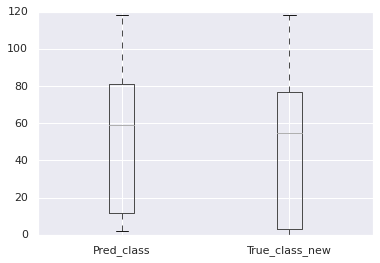

In [70]:
boxplot = df.boxplot(column=['Pred_class', 'True_class_new'])

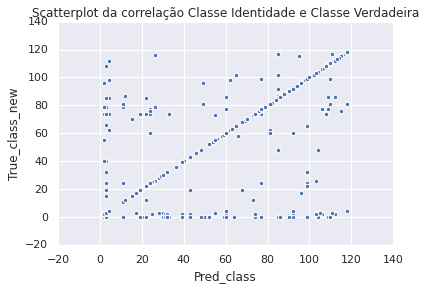

In [71]:
plt.scatter(df['Pred_class'], df['True_class_new'])
plt.title('Scatterplot da correlação Classe Identidade e Classe Verdadeira')
plt.xlabel('Pred_class')
plt.ylabel('True_class_new')
plt.show()

## Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas

In [72]:
#Criando variaveis independentes e dependentes
#utilizaremos apenas as variáveis numéricas

y = df['Pred_class']
X = df.iloc[ :, [1,4]].values

In [73]:
#Pré-Processamento Básico Padronizando as Variáveis Contínuas
X = MinMaxScaler().fit_transform(X)

In [74]:
#Separando o dados em Treino e Teste
x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)

In [75]:
#Ajustando o KNN nos dados de Treino
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
#Calculando a Matriz de Confusão nos dados de Teste
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   2   3  4  11  12  15  21  22  ...  85  87  96  99  103  108  110  All
Real                                    ...                                    
2         9   3  3   0   0   0   1   0  ...   0   0   0   0    0    0    0   17
3         6  12  1   0   0   0   0   0  ...   0   0   0   0    0    0    0   20
4         0   0  1   0   0   0   0   0  ...   0   0   0   0    0    0    0    2
11        0   0  0   0   0   0   0   0  ...   0   0   0   0    0    0    0    1
12        0   0  2   0   0   0   0   0  ...   0   0   0   0    0    0    0    2
17        0   0  0   1   0   1   0   0  ...   0   0   0   0    0    0    0    2
22        0   0  0   0   0   0   0   2  ...   0   0   0   0    0    0    0    2
24        0   1  0   0   0   0   0   0  ...   0   0   0   0    0    0    0    3
25        1   1  0   0   0   0   0   1  ...   0   0   0   0    0    0    0    3
26        0   0  0   0   0   0   0   0  ...   0   0   0   0    0    0    0    1
29        0   0  0   0   0   0   0   0  

###Calculando as métricas de validação

In [77]:
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           2       0.36      0.53      0.43        17
           3       0.60      0.60      0.60        20
           4       0.11      0.50      0.18         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         0
          22       0.50      1.00      0.67         2
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.50      1.00      0.67         1
          33       0.00      0.00      0.00         0
          48       0.00    

##Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold);

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
# data and target
dados, target = df.drop(columns = ['status','True_class']), df['status']
#dados.drop(columns = ['True_class'])

In [80]:
print(dados)

     Pred_class  probabilidade  True_class_new
0             2       0.079892               0
1             2       0.379377              74
2             2       0.379377              74
3             2       0.420930              74
4             2       0.607437               2
..          ...            ...             ...
638          60       0.543772              60
639          60       0.553846              60
640          77       0.606065              77
641          84       0.561842              84
642          96       0.340740              96

[643 rows x 3 columns]


In [81]:
print(target)

0      approved
1      approved
2      approved
3      approved
4      approved
         ...   
638    revision
639    revision
640    revision
641    revision
642    revision
Name: status, Length: 643, dtype: object


In [82]:
# KNN classifier model
knn = KNeighborsClassifier()

# K-fold (k=5)
scores = cross_val_score(knn, dados, target, cv=5, scoring='accuracy')

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


## Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença